In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Importing the dataset
dataset = pd.read_csv('bullet_train .csv')


In [6]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3rd,male,22.0,1,7.2500
1,1,1st,female,38.0,1,71.2833
2,1,3rd,female,26.0,0,7.9250
3,1,1st,female,35.0,1,53.1000
4,0,3rd,male,35.0,0,8.0500
...,...,...,...,...,...,...
886,0,2nd,male,27.0,0,13.0000
887,1,1st,female,19.0,0,30.0000
888,0,3rd,female,NaN,1,23.4500
889,1,1st,male,26.0,0,30.0000


In [7]:
X = dataset.iloc[:, 1:6].values  #input data columns
y = dataset.iloc[:, 0].values  #output


In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
ct = ColumnTransformer([("Pclass", OneHotEncoder(), [0])], remainder = 'passthrough')

In [10]:
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
#As "Sex" is categorical data so let`s use LabelEncoder to covert it into Numerical data
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
X = ct.fit_transform(X) #.toarray()
X = X[:, 1:]

In [11]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [13]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [14]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 6))

# Adding the other hidden layers
classifier.add(Dense(256, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(128, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(128, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(64, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(32, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(16, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Note: change layers, increase no.of neurons, batch size(leass means good training),epoch

#add early stopping to avoid overfitting
#es_callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 32, epochs = 350,verbose=1,validation_data=(X_test, y_test))


Epoch 1/350
23/23 [==============================] - 5s 56ms/step - loss: 0.6924 - accuracy: 0.6244 - val_loss: 0.6903 - val_accuracy: 0.6145
Epoch 2/350
23/23 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.6236 - val_loss: 0.6817 - val_accuracy: 0.6145
Epoch 3/350
23/23 [==============================] - 0s 4ms/step - loss: 0.6643 - accuracy: 0.6147 - val_loss: 0.5438 - val_accuracy: 0.6145
Epoch 4/350
23/23 [==============================] - 0s 3ms/step - loss: 0.5649 - accuracy: 0.6072 - val_loss: 0.5271 - val_accuracy: 0.6145
Epoch 5/350
23/23 [==============================] - 0s 5ms/step - loss: 0.5429 - accuracy: 0.5988 - val_loss: 0.5336 - val_accuracy: 0.7933
Epoch 6/350
23/23 [==============================] - 0s 4ms/step - loss: 0.5319 - accuracy: 0.8171 - val_loss: 0.4791 - val_accuracy: 0.7989
Epoch 7/350
23/23 [==============================] - 0s 5ms/step - loss: 0.5013 - accuracy: 0.7742 - val_loss: 0.4404 - val_accuracy: 0.7933
Epoch 8/350


Epoch 59/350
23/23 [==============================] - 0s 4ms/step - loss: 0.4433 - accuracy: 0.8005 - val_loss: 0.4142 - val_accuracy: 0.8101
Epoch 60/350
23/23 [==============================] - 0s 3ms/step - loss: 0.4355 - accuracy: 0.8131 - val_loss: 0.4095 - val_accuracy: 0.8101
Epoch 61/350
23/23 [==============================] - 0s 4ms/step - loss: 0.4123 - accuracy: 0.8143 - val_loss: 0.4178 - val_accuracy: 0.8101
Epoch 62/350
23/23 [==============================] - 0s 4ms/step - loss: 0.4589 - accuracy: 0.8042 - val_loss: 0.4050 - val_accuracy: 0.8156
Epoch 63/350
23/23 [==============================] - 0s 4ms/step - loss: 0.4327 - accuracy: 0.8224 - val_loss: 0.4028 - val_accuracy: 0.8212
Epoch 64/350
23/23 [==============================] - 0s 4ms/step - loss: 0.4856 - accuracy: 0.7952 - val_loss: 0.4099 - val_accuracy: 0.8156
Epoch 65/350
23/23 [==============================] - 0s 4ms/step - loss: 0.4524 - accuracy: 0.8136 - val_loss: 0.4103 - val_accuracy: 0.8045
Epoch 

23/23 [==============================] - 0s 5ms/step - loss: 0.4133 - accuracy: 0.8308 - val_loss: 0.4269 - val_accuracy: 0.7933
Epoch 117/350
23/23 [==============================] - 0s 3ms/step - loss: 0.4015 - accuracy: 0.8388 - val_loss: 0.4090 - val_accuracy: 0.8101
Epoch 118/350
23/23 [==============================] - 0s 4ms/step - loss: 0.4242 - accuracy: 0.8233 - val_loss: 0.4118 - val_accuracy: 0.8101
Epoch 119/350
23/23 [==============================] - 0s 4ms/step - loss: 0.4257 - accuracy: 0.8163 - val_loss: 0.4118 - val_accuracy: 0.8156
Epoch 120/350
23/23 [==============================] - 0s 5ms/step - loss: 0.4447 - accuracy: 0.8097 - val_loss: 0.4121 - val_accuracy: 0.8101
Epoch 121/350
23/23 [==============================] - 0s 4ms/step - loss: 0.4203 - accuracy: 0.8167 - val_loss: 0.4159 - val_accuracy: 0.8101
Epoch 122/350
23/23 [==============================] - 0s 4ms/step - loss: 0.4376 - accuracy: 0.8091 - val_loss: 0.4143 - val_accuracy: 0.8101
Epoch 123/350

23/23 [==============================] - 0s 4ms/step - loss: 0.4046 - accuracy: 0.8130 - val_loss: 0.4466 - val_accuracy: 0.8101
Epoch 174/350
23/23 [==============================] - 0s 3ms/step - loss: 0.4307 - accuracy: 0.8076 - val_loss: 0.4431 - val_accuracy: 0.8101
Epoch 175/350
23/23 [==============================] - 0s 4ms/step - loss: 0.4245 - accuracy: 0.8127 - val_loss: 0.4600 - val_accuracy: 0.7989
Epoch 176/350
23/23 [==============================] - 0s 3ms/step - loss: 0.4191 - accuracy: 0.8232 - val_loss: 0.4457 - val_accuracy: 0.7989
Epoch 177/350
23/23 [==============================] - 0s 4ms/step - loss: 0.4066 - accuracy: 0.8114 - val_loss: 0.4632 - val_accuracy: 0.8045
Epoch 178/350
23/23 [==============================] - 0s 4ms/step - loss: 0.4111 - accuracy: 0.8280 - val_loss: 0.4650 - val_accuracy: 0.7933
Epoch 179/350
23/23 [==============================] - 0s 4ms/step - loss: 0.4156 - accuracy: 0.8093 - val_loss: 0.4691 - val_accuracy: 0.8045
Epoch 180/350

23/23 [==============================] - 0s 5ms/step - loss: 0.4047 - accuracy: 0.8181 - val_loss: 0.5078 - val_accuracy: 0.8045
Epoch 231/350
23/23 [==============================] - 0s 5ms/step - loss: 0.4003 - accuracy: 0.8353 - val_loss: 0.5090 - val_accuracy: 0.8045
Epoch 232/350
23/23 [==============================] - 0s 4ms/step - loss: 0.3966 - accuracy: 0.8281 - val_loss: 0.5123 - val_accuracy: 0.8101
Epoch 233/350
23/23 [==============================] - 0s 4ms/step - loss: 0.3789 - accuracy: 0.8376 - val_loss: 0.5262 - val_accuracy: 0.7877
Epoch 234/350
23/23 [==============================] - 0s 4ms/step - loss: 0.3977 - accuracy: 0.8242 - val_loss: 0.5326 - val_accuracy: 0.7877
Epoch 235/350
23/23 [==============================] - 0s 3ms/step - loss: 0.4058 - accuracy: 0.8292 - val_loss: 0.5339 - val_accuracy: 0.7933
Epoch 236/350
23/23 [==============================] - 0s 4ms/step - loss: 0.4038 - accuracy: 0.8277 - val_loss: 0.5751 - val_accuracy: 0.7989
Epoch 237/350

23/23 [==============================] - 0s 4ms/step - loss: 0.3815 - accuracy: 0.8370 - val_loss: 0.5893 - val_accuracy: 0.7989
Epoch 288/350
23/23 [==============================] - 0s 4ms/step - loss: 0.3833 - accuracy: 0.8322 - val_loss: 0.6226 - val_accuracy: 0.7989
Epoch 289/350
23/23 [==============================] - 0s 3ms/step - loss: 0.3384 - accuracy: 0.8498 - val_loss: 0.5975 - val_accuracy: 0.8212
Epoch 290/350
23/23 [==============================] - 0s 4ms/step - loss: 0.3769 - accuracy: 0.8336 - val_loss: 0.6036 - val_accuracy: 0.8156
Epoch 291/350
23/23 [==============================] - 0s 3ms/step - loss: 0.3874 - accuracy: 0.8388 - val_loss: 0.6427 - val_accuracy: 0.7933
Epoch 292/350
23/23 [==============================] - 0s 4ms/step - loss: 0.3873 - accuracy: 0.8454 - val_loss: 0.4940 - val_accuracy: 0.8045
Epoch 293/350
23/23 [==============================] - 0s 4ms/step - loss: 0.4124 - accuracy: 0.8239 - val_loss: 0.5636 - val_accuracy: 0.8212
Epoch 294/350

23/23 [==============================] - 0s 4ms/step - loss: 0.3540 - accuracy: 0.8613 - val_loss: 0.7327 - val_accuracy: 0.7933
Epoch 345/350
23/23 [==============================] - 0s 4ms/step - loss: 0.3632 - accuracy: 0.8702 - val_loss: 0.7283 - val_accuracy: 0.7933
Epoch 346/350
23/23 [==============================] - 0s 4ms/step - loss: 0.3665 - accuracy: 0.8501 - val_loss: 0.7494 - val_accuracy: 0.7933
Epoch 347/350
23/23 [==============================] - 0s 4ms/step - loss: 0.3768 - accuracy: 0.8395 - val_loss: 0.7556 - val_accuracy: 0.7933
Epoch 348/350
23/23 [==============================] - 0s 4ms/step - loss: 0.3651 - accuracy: 0.8615 - val_loss: 0.7670 - val_accuracy: 0.7877
Epoch 349/350
23/23 [==============================] - 0s 4ms/step - loss: 0.3508 - accuracy: 0.8646 - val_loss: 0.7307 - val_accuracy: 0.8045
Epoch 350/350
23/23 [==============================] - 0s 5ms/step - loss: 0.3752 - accuracy: 0.8418 - val_loss: 0.7549 - val_accuracy: 0.7877


Train size =  712

Test size =  179


Training accuracy: 0.8252006391116551

6/6 [==============================] - 0s 2ms/step - loss: 0.7549 - accuracy: 0.7877

Test accuracy: 0.7877094745635986

[[94 16]
 [22 47]]


<AxesSubplot:>

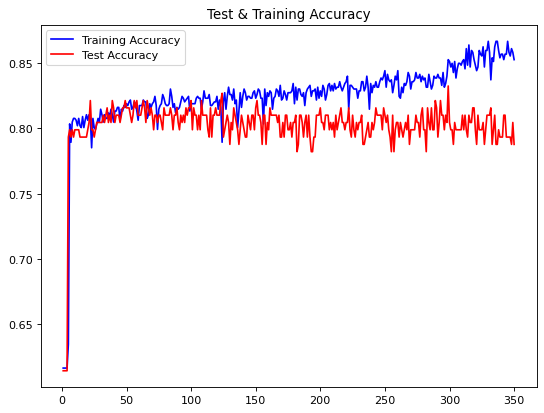

<Figure size 432x288 with 0 Axes>

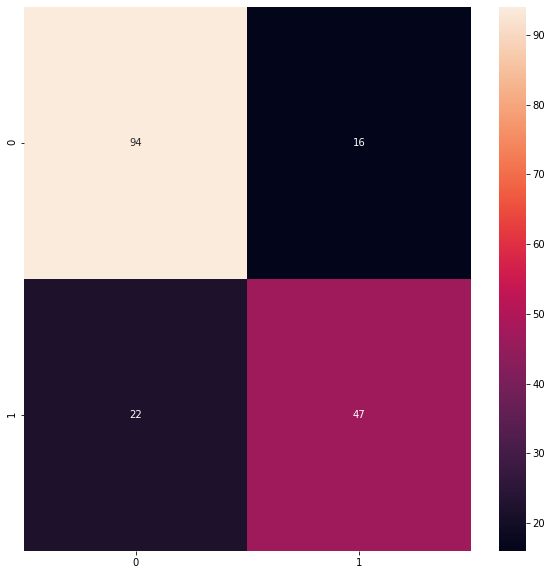

In [17]:
# Part 3 - Making the predictions and evaluating the model

train_acc = history.history['accuracy']
test_loss = history.history['val_accuracy']
epochs = range(1,len(train_acc)+1)

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(epochs, train_acc, 'b', label = 'Training Accuracy')
plt.plot(epochs, test_loss, 'r', label='Test Accuracy')

plt.title('Test & Training Accuracy')
plt.legend()
plt.figure()
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
print('Train size = ', len(y_train))
print('')

print('Test size = ', len(y_test))
print('')

print('\n''Training accuracy:', np.mean(history.history['accuracy']))
print('')

score = classifier.evaluate(X_test, y_test, verbose=1)
print('\n''Test accuracy:', score[1])
print('')
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
 
cm = confusion_matrix(y_test, y_pred)
print(cm)
#plot_confusion_matrix(y_test, y_pred)  

plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)